***Problem Statement 1: Classify Images into Specific Classes Using Multi-Layer  Perceptron ***

The dataset is similar to MNIST but includes images of garments and accessories. The objective is  to classify images into specific classes using Multi-Layer Perceptron (MLP). 

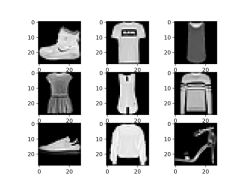

Dataset: 
Total Images: 70,000 
Train Images: 60,000 
Test Images: 10,000 
Image Size: 28 X 28 

Different Classes: 
Classes: T-shirt/Top, Trouser, Pullover, Dress, Coat, Sandal, Shirt, Sneaker, Bag, Ankle Boot. 

***Question 1: ***

A) Reshape and normalize the data: 

• Reshape the input image as demonstrated below: 

o train: 60000, 28 * 28 * 1 

o test: 10000, 28 * 28*1 

• Change the data type to float32

• Normalize the data by dividing with 255 

B) Convert y_train and y_test to categorical by using tf.keras.utils.to_categorical function and  define num_classes=10 

In [1]:
import tensorflow as tf
from keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D
import numpy as np
import pandas as pd

fashion = tf.keras.datasets.fashion_mnist
(train_X, train_y),(test_X,test_y) = fashion.load_data()
#train_X = np.expand_dims(train_X, axis=-1)
class_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle Boot']
train_X = train_X.reshape(-1, 28,28, 1)
test_X = test_X.reshape(-1, 28,28, 1)
print('The shape of the train data : ',train_X.shape)
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
train_X = train_X/255.0
test_X = test_X/255.0

train_y = tf.keras.utils.to_categorical(train_y, num_classes=10)
test_y = tf.keras.utils.to_categorical(test_y, num_classes=10)

'''
grid_w = 5
grid_l = 5
fig, axis = plt.subplots(grid_l, grid_w, figsize=(25, 15))
axis = axis.ravel()
for a in range(grid_l * grid_w):
    i = np.random.randint(0, len(train_X))
    axis[a].imshow(train_X[i].reshape((28, 28)), cmap='gray')
    axis[a].axis('off')
    axis[a].set_title(class_names[train_y.argmax(axis=1)[i]])
plt.subplots_adjust(hspace=0.8)
plt.show()
'''

4423680/4422102 [==============================] - 0s 0us/step
The shape of the train data :  (60000, 28, 28, 1)


"\ngrid_w = 5\ngrid_l = 5\nfig, axis = plt.subplots(grid_l, grid_w, figsize=(25, 15))\naxis = axis.ravel()\nfor a in range(grid_l * grid_w):\n    i = np.random.randint(0, len(train_X))\n    axis[a].imshow(train_X[i].reshape((28, 28)), cmap='gray')\n    axis[a].axis('off')\n    axis[a].set_title(class_names[train_y.argmax(axis=1)[i]])\nplt.subplots_adjust(hspace=0.8)\nplt.show()\n"

***Question 2: ***

Write an MLP using TensorFlow for fashion MNIST data to determine all 10 classes. Solve for each  question: 

Take epoch= 2000 

A) Create 4 layers using keras: 

B) Compile the model by defining Cost function as cross entropy and Optimizer as Gradient  Descent: 


In [ ]:
model = tf.keras.models.Sequential()

# Four layers, which has a 2D Convolutional layer with kernel size as 3*3, ReLU activation and Max pooling operation
model.add(Conv2D(64, (3,3), input_shape=(28, 28, 1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(64))
model.add(Dense(10))
model.add(Activation('softmax'))
model.summary()


'''
model_mlp.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(), optimizer = tf.keras.optimizers.SGD(learning_rate=0.1), metrics=[tf.keras.metrics.SparseCategoricalAccuracy()])                       
    #optimizer=keras.optimizers.SGD(lr=.001),#optimizer='sgd',   
    #history_mlp = train_model(model_mlp, train_X, train_y, X_valid=test_X, y_valid=test_y, epochs=2000)
model_mlp.fit_generator(train_X, train_y, epochs=2000)
'''

# Optimizer specified here is adam, loss is categorical crossentrophy and metric is accuracy
model.compile(optimizer='sgd', loss=tf.keras.losses.categorical_crossentropy, metrics=['accuracy'])

model.fit(train_X, train_y, batch_size=64, epochs=2000)

938/938 [==============================] - 4s 4ms/step - loss: 0.0382 - accuracy: 0.9872
Epoch 202/2000
938/938 [==============================] - 4s 4ms/step - loss: 0.0431 - accuracy: 0.9863
Epoch 203/2000
938/938 [==============================] - 4s 4ms/step - loss: 0.0364 - accuracy: 0.9882
Epoch 204/2000
938/938 [==============================] - 4s 4ms/step - loss: 0.0411 - accuracy: 0.9862
Epoch 205/2000
938/938 [==============================] - 4s 4ms/step - loss: 0.0389 - accuracy: 0.9869
Epoch 206/2000
938/938 [==============================] - 4s 4ms/step - loss: 0.0347 - accuracy: 0.9892
Epoch 207/2000
938/938 [==============================] - 4s 4ms/step - loss: 0.0341 - accuracy: 0.9895
Epoch 208/2000
938/938 [==============================] - 4s 4ms/step - loss: 0.0382 - accuracy: 0.9870
Epoch 209/2000
938/938 [==============================] - 4s 4ms/step - loss: 0.0324 - accuracy: 0.9894
Epoch 210/2000
938/938 [==============================] - 4s 4ms/step - loss: 0

In [ ]:
test_loss, test_acc = model.evaluate(test_X, test_y)
print('Test loss', test_loss)
print('Test accuracy', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 1.7474 - accuracy: 0.8855
Test loss 1.747400164604187
Test accuracy 0.8855000138282776


***Question 3: ***

Now, initialize variables, cost function and optimizer to initiate the training. Use Adam as the  Optimizer 


In [ ]:
model.compile(optimizer='adam', loss=tf.keras.losses.categorical_crossentropy, metrics=['accuracy'])

model.fit(train_X, train_y, batch_size=64, epochs=2000)

test_loss, test_acc = model.evaluate(test_X, test_y)
print('Test loss', test_loss)
print('Test accuracy', test_acc)

Epoch 1/2000
938/938 [==============================] - 4s 4ms/step - loss: 0.6566 - accuracy: 0.9194
Epoch 2/2000
938/938 [==============================] - 3s 3ms/step - loss: 0.3225 - accuracy: 0.9328
Epoch 3/2000
938/938 [==============================] - 3s 3ms/step - loss: 0.2472 - accuracy: 0.9383
Epoch 4/2000
938/938 [==============================] - 3s 3ms/step - loss: 0.1841 - accuracy: 0.9431
Epoch 5/2000
938/938 [==============================] - 3s 3ms/step - loss: 0.1684 - accuracy: 0.9446
Epoch 6/2000
938/938 [==============================] - 3s 3ms/step - loss: 0.1519 - accuracy: 0.9458
Epoch 7/2000
938/938 [==============================] - 3s 3ms/step - loss: 0.1402 - accuracy: 0.9504
Epoch 8/2000
938/938 [==============================] - 3s 3ms/step - loss: 0.1468 - accuracy: 0.9468
Epoch 9/2000
938/938 [==============================] - 3s 4ms/step - loss: 0.1347 - accuracy: 0.9492
Epoch 10/2000
938/938 [==============================] - 3s 3ms/step - loss: 0.132

***Problem Statement 2: Categorizing Faces based on Emotions ***

The data encompasses 48x48 pixel grayscale images of faces with different expressions. Each face  is positioned in the center, occupying the same amount of space as in other images. The task is to  categorize each face based on the emotions into one of seven categories (0=Angry, 1=Disgust,  2=Fear, 3=Happy, 4=Sad, 5=Surprise, 6=Neutral).

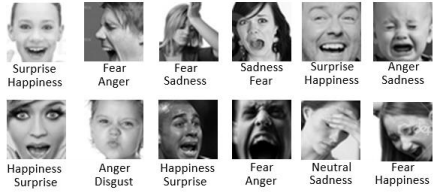

Fer2013.csv (a file consisting of data sets about different facial expressions) contains two columns,  "emotion" and "pixels". The "emotion" column contains a numeric code ranging from 0 to 6, each  code representative of an emotion as mentioned above. The "pixels" column, on the other hand,  contains a string surrounded by quotes for each image.  

The data set consists of 28,709 examples. This data set was prepared by Pierre-Luc Carrier and  Aaron Courville, as part of an ongoing research project. They have graciously provided the  workshop organizers with a preliminary version of their dataset 

**Note:** Install the latest version of TensorFlow 2.0 using the below command  !pip install --upgrade tensorflow 


***Question 1: ***

Reshape and normalize the data:

***Hint: ***

• Split pixels by space to get columns 

• Reshape the input image as demonstrated below 
 
*   48, 48, 1

• Change the data type to float32 


In [ ]:

from google.colab import drive 
#get drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import tensorflow as tf
from keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D, BatchNormalization, Dropout
import numpy as np
import pandas as pd
import cv2

image_size=(48,48)
 
def load_fer2013():
    data = pd.read_csv('/content/drive/My Drive/Data Science/All Modules/6 AI and Deep Learning/5 Assignments & Test/fer2013.csv')
    pixels = data['pixels'].tolist()
    width, height = 48, 48
    faces = []
    for pixel_sequence in pixels:
        face = [int(pixel) for pixel in pixel_sequence.split(' ')]
        face = np.asarray(face).reshape(width, height)
        face = cv2.resize(face.astype('uint8'),image_size)
        faces.append(face.astype('float32'))
    faces = np.asarray(faces)
    faces = np.expand_dims(faces, -1)
    emotions = pd.get_dummies(data['emotion'].values)
    return faces, emotions
 
x, y = load_fer2013()

***Question 2: ***

Normalize the inputs & use the Train-Test Split method to make the split. 

***Hint: ***

• Normalize the data by dividing it with 255 

• Split the data into training and testing (90,10). 90% of the data will be allotted to training  and the rest 10% to testing 

In [ ]:
from sklearn.model_selection import train_test_split

def preprocess_input(x, v2=True):
    x = x.astype('float32')
    x = x / 255.0
    if v2:
        x = x - 0.5
        x = x * 2.0
    return x

x = preprocess_input(x)
print(type(emotions))
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.1)
xtrain = np.array(xtrain)
xtest = np.array(xtest)
ytrain = np.array(ytrain)
ytest = np.array(ytest)


<class 'pandas.core.frame.DataFrame'>


***Question 3: ***

Define CNN Model based on the layers mentioned below: 

Layer 1 

• 2 Conv2d with 64 filters of 5,5 filter 

• BatchNormalization layer 

• Max Pooling layer with 2,2 

• Activation ReLU 

Layer 2 

• 2 Conv2d with 128 filters of 5,5 filter 

• BatchNormalization layer 

• Max Pooling layer with 2,2 

• Activation ReLU 

Layer 3 

• 2 Conv2d with 256 filters of 3,3 filter 

• BatchNormalization layer 

• Max Pooling layer with 2,2 

• Activation ReLU 

Layer 4 

• Flatten layer 

• Dense Layer with 128 Neuron 

• BatchNormalization 

• Activation Relu 

• Dropout 0.25 

• Dense 7 neurons with Softmax 

Loss: Categorical cross-entropy

Optimizer: Adam 

Layer (type) Output Shape Param # 

================================================================= conv2d_1 (Conv2D) (None, 48, 48, 64) 1664 

_________________________________________________________________ conv2d_2 (Conv2D) (None, 48, 48, 64) 102464 

_________________________________________________________________ batch_normalization_1 (Batch (None, 48, 48, 64) 256 

_________________________________________________________________ max_pooling2d_1 (MaxPooling2 (None, 24, 24, 64) 0 

_________________________________________________________________ conv2d_3 (Conv2D) (None, 24, 24, 128) 204928 

_________________________________________________________________ conv2d_4 (Conv2D) (None, 24, 24, 128) 409728 

_________________________________________________________________ batch_normalization_2 (Batch (None, 24, 24, 128) 512 

_________________________________________________________________ max_pooling2d_2 (MaxPooling2 (None, 12, 12, 128) 0 

_________________________________________________________________ conv2d_5 (Conv2D) (None, 12, 12, 256) 295168 

_________________________________________________________________ conv2d_6 (Conv2D) (None, 12, 12, 256) 590080 

_________________________________________________________________ batch_normalization_3 (Batch (None, 12, 12, 256) 1024 

_________________________________________________________________ max_pooling2d_3 (MaxPooling2 (None, 6, 6, 256) 0 

_________________________________________________________________ flatten_1 (Flatten) (None, 9216) 0 

_________________________________________________________________ dense_1 (Dense) (None, 128) 1179776 

_________________________________________________________________ batch_normalization_4 (Batch (None, 128) 512 

_________________________________________________________________ activation_1 (Activation) (None, 128) 0 

_________________________________________________________________ dropout_1 (Dropout) (None, 128) 0 

_________________________________________________________________ dense_2 (Dense) (None, 7) 903 

_________________________________________________________________ activation_2 (Activation) (None, 7) 0 

================================================================ 

Total params: 2,787,015 

Trainable params: 2,785,863 

Non-trainable params: 1,152 

In [ ]:
from keras.models import Sequential
import tensorflow as tf

model = Sequential()

# Four layers, which has a 2D Convolutional layer with kernel size as 3*3, ReLU activation and Max pooling operation
model.add(Conv2D(64, (5,5), input_shape=(48, 48, 1), activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(128, (5,5), activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(256, (3,3), activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Dense(7, activation = 'softmax'))
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 44, 44, 64)        1664      
_________________________________________________________________
batch_normalization_4 (Batch (None, 44, 44, 64)        256       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 22, 22, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 18, 18, 128)       204928    
_________________________________________________________________
batch_normalization_5 (Batch (None, 18, 18, 128)       512       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 9, 9, 128)         0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 7, 7, 256)        

**Question 4:**

Fit CNN Model on the training data using the hint mentioned below: 

***Hint: ***

• Epoch = 20 

• Batch_size 64 

• Lr = 1e-3 


In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.001), loss=tf.keras.losses.categorical_crossentropy, metrics=['accuracy'])

model.fit(xtrain, ytrain, batch_size=64, epochs=20)

Epoch 1/20
505/505 [==============================] - 6s 11ms/step - loss: 1.9382 - accuracy: 0.3063
Epoch 2/20
505/505 [==============================] - 6s 11ms/step - loss: 1.3380 - accuracy: 0.4934
Epoch 3/20
505/505 [==============================] - 6s 11ms/step - loss: 1.1511 - accuracy: 0.5668
Epoch 4/20
505/505 [==============================] - 6s 11ms/step - loss: 1.0366 - accuracy: 0.6126
Epoch 5/20
505/505 [==============================] - 6s 11ms/step - loss: 0.9159 - accuracy: 0.6631
Epoch 6/20
505/505 [==============================] - 5s 11ms/step - loss: 0.7947 - accuracy: 0.7090
Epoch 7/20
505/505 [==============================] - 5s 11ms/step - loss: 0.6752 - accuracy: 0.7571
Epoch 8/20
505/505 [==============================] - 5s 11ms/step - loss: 0.5338 - accuracy: 0.8124
Epoch 9/20
505/505 [==============================] - 5s 11ms/step - loss: 0.4305 - accuracy: 0.8487
Epoch 10/20
505/505 [==============================] - 5s 11ms/step - loss: 0.3350 - accura

**Question 5:** 

Draw a confusion matrix for the trained model using the hint mentioned below. 

**Hint:** 

• Use model.predict_classes 

• Use np.argmax(y_test,axis=1)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


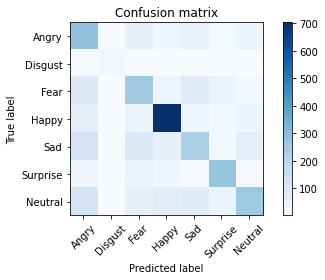

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

y_pred = model.predict_classes(xtest)

cm = confusion_matrix(ytest, y_pred)
#print(cm)

labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']
title='Confusion matrix'

plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title(title)
plt.colorbar()
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels, rotation=45)
plt.yticks(tick_marks, labels)

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()
plt.show()